In [ ]:
# !pip install huggingface_hub
# from huggingface_hub import hf_hub_download
# from huggingface_hub import login

# login(token="")
# hf_hub_download(repo_id='Zihan1004/FNSPID',
# filename='')

# #import the file or repository
# !git clone http://huggingface.co/username/repository

# #this converts the zip to a usable format

# !zip -FF path/to/zipfile --output path/to/output/zip

# #unzip the file
# !unzip path/to/your/zip

Import Data Sets

In [ ]:
!wget https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/main/Stock_news/All_external.csv

--2025-04-06 23:44:26--  https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/main/Stock_news/All_external.csv
Resolving huggingface.co (huggingface.co)... 3.169.137.19, 3.169.137.5, 3.169.137.119, ...
Connecting to huggingface.co (huggingface.co)|3.169.137.19|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/a0/19/a01967ba742831f4b6903f146b4f5d9a3d2eeeefa619387e8cc87df2d889332c/5d4c018036bd82ca821da71b7a9c0c7db3289642e0fc6f897ea69f4a0c5135c3?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27All_external.csv%3B+filename%3D%22All_external.csv%22%3B&response-content-type=text%2Fcsv&Expires=1743986666&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0Mzk4NjY2Nn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2EwLzE5L2EwMTk2N2JhNzQyODMxZjRiNjkwM2YxNDZiNGY1ZDlhM2QyZWVlZWZhNjE5Mzg3ZThjYzg3ZGYyZDg4OTMzMmMvNWQ0YzAxODAzNmJkODJjYTgyMWRhNzFiN2E5YzBjN2RiMzI4OTY0MmUwZ

In [1]:
!wget https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/main/Stock_price/full_history.zip

--2025-04-15 19:41:12--  https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/main/Stock_price/full_history.zip
Resolving huggingface.co (huggingface.co)... 18.172.134.88, 18.172.134.4, 18.172.134.24, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.88|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/a0/19/a01967ba742831f4b6903f146b4f5d9a3d2eeeefa619387e8cc87df2d889332c/03da4fce7ebea90d5715ba3501773d410ae663b617027b338ef000a9955dab91?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27full_history.zip%3B+filename%3D%22full_history.zip%22%3B&response-content-type=application%2Fzip&Expires=1744749672&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0NDc0OTY3Mn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2EwLzE5L2EwMTk2N2JhNzQyODMxZjRiNjkwM2YxNDZiNGY1ZDlhM2QyZWVlZWZhNjE5Mzg3ZThjYzg3ZGYyZDg4OTMzMmMvMDNkYTRmY2U3ZWJlYTkwZDU3MTViYTM1MDE3NzNkNDEwYW

In [2]:
!unzip full_history.zip -d /content/full_history

Streaming output truncated to the last 5000 lines.
  inflating: /content/full_history/full_history/FDD.csv  
  inflating: /content/full_history/__MACOSX/full_history/._FDD.csv  
  inflating: /content/full_history/full_history/WATT.csv  
  inflating: /content/full_history/__MACOSX/full_history/._WATT.csv  
  inflating: /content/full_history/full_history/MRTN.csv  
  inflating: /content/full_history/__MACOSX/full_history/._MRTN.csv  
  inflating: /content/full_history/full_history/FFIU.csv  
  inflating: /content/full_history/__MACOSX/full_history/._FFIU.csv  
  inflating: /content/full_history/full_history/DLPN.csv  
  inflating: /content/full_history/__MACOSX/full_history/._DLPN.csv  
  inflating: /content/full_history/full_history/FIT.csv  
  inflating: /content/full_history/__MACOSX/full_history/._FIT.csv  
  inflating: /content/full_history/full_history/WTBA.csv  
  inflating: /content/full_history/__MACOSX/full_history/._WTBA.csv  
  inflating: /content/full_history/full_history/kt

Data Exploration

In [69]:
#Import necessary libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

Analyze stock data

In [21]:
def get_stock_df(stock_name):
  df = pd.read_csv(f'full_history/full_history/{stock_name}.csv')
  df.head(10).sort_values('date',ascending=True)
  df["date"] = pd.to_datetime(df["date"])
  return df

aapl = get_stock_df('NFLX')
aapl

,date,volume,open,high,low,close,adj close
0,2020-06-19,5934500,449.119995,453.970001,445.600006,453.720001,453.720001
1,2020-06-18,4277600,448.730011,452.760010,442.799988,449.869995,449.869995
2,2020-06-17,6522400,441.820007,450.459991,439.220001,447.769989,447.769989
3,2020-06-16,5507900,425.760010,437.959991,425.179993,436.130005,436.130005
4,2020-06-15,4467900,421.399994,426.489990,415.420013,425.500000,425.500000
...,...,...,...,...,...,...,...
4546,2002-05-30,10154200,1.107857,1.107857,1.071429,1.071429,1.071429
4547,2002-05-29,6757800,1.164286,1.164286,1.085714,1.103571,1.103571
4548,2002-05-28,6609400,1.213571,1.232143,1.157143,1.157143,1.157143
4549,2002-05-24,11104800,1.214286,1.225000,1.197143,1.210000,1.210000


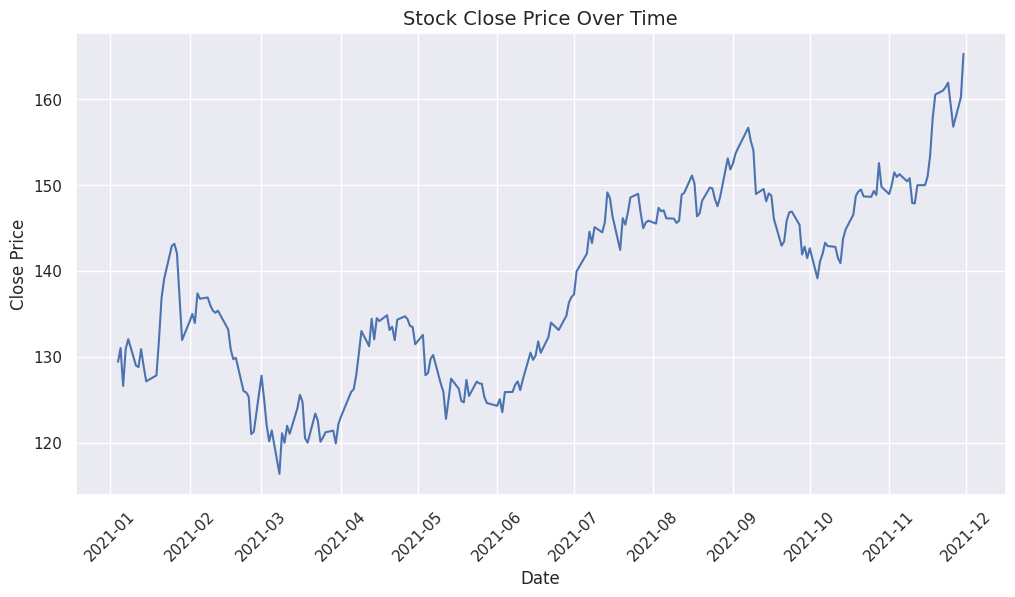

In [5]:
def plot_stock_prices(stock_df, start_date=None, end_date=None,column="close"):
    """
    Plots stock prices over time using Seaborn.

    Parameters:
    - df (pd.DataFrame): DataFrame containing stock data with a 'date' column.
    - start_date (str, optional): Start date in 'YYYY-MM-DD' format.
    - end_date (str, optional): End date in 'YYYY-MM-DD' format.
    - column (str, optional): Column to plot (default: 'close').

    Returns:
    - None (displays the plot)
    """
    # Convert 'date' column to datetime format
    stock_df = pd.DataFrame(stock_df)
    stock_df["date"] = pd.to_datetime(stock_df["date"])

    # Filter data based on date range
    if start_date:
        stock_df = stock_df[stock_df["date"] >= pd.to_datetime(start_date)]
    if end_date:
        stock_df = stock_df[stock_df["date"] <= pd.to_datetime(end_date)]

    # Set Seaborn style
    sns.set_theme(style="darkgrid")

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="date", y=column, data=stock_df, linewidth=1.5)

    # Customize the plot
    plt.xlabel("Date", fontsize=12)
    plt.ylabel(f"{column.capitalize()} Price", fontsize=12)
    plt.title(f"Stock {column.capitalize()} Price Over Time", fontsize=14)
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

#Preview stock prices
plot_stock_prices(aapl,'2021-01-01','2021-11-30')

In [ ]:
def get_articles(tickers,publishers=None,start_date=None,end_date=None,limit=None):

  # Load the CSV file
  file_path = '/content/All_external.csv'

  # Column indices mapping
  cols = {
      'Date': 0,
      'Article_title': 1,
      'Stock_symbol': 2,
      'Url': 3,
      'Publisher': 4,
      'Author': 5,
      'Article': 6,
      'Lsa_summary': 7,
      'Luhn_summary': 8,
      'Textrank_summary': 9,
      'Lexrank_summary': 10
  }

  rows = []
  i = 0

  with open(file_path) as f:
      reader = csv.reader(f)
      for line in reader:
          if i == 0:
              header = line  # Capture header row
              i += 1
              continue

          if limit is not None and i > limit:
              break

          stock_symbol = line[cols['Stock_symbol']]
          date = line[cols['Date']]
          publisher = line[cols['Publisher']]

          # Conditions
          is_ticker_valid = (not tickers) or (stock_symbol in tickers)
          is_date_valid = (not start_date or date >= start_date) and (not end_date or date <= end_date)
          is_publisher_valid = (not publishers) or (publisher in publishers)

          # Append row if all conditions are met
          if is_ticker_valid and is_date_valid and is_publisher_valid:
              rows.append(line)
              i += 1

  # Convert to DataFrame
  temp_df_ = pd.DataFrame(rows, columns=header)
  temp_df_['Date'] = pd.to_datetime(temp_df_['Date']).dt.date
  return temp_df_

In [ ]:
largest_stocks = [
    # NASDAQ-listed stocks
    "AAPL", "MSFT", "AMZN", "GOOGL", "GOOG", "META", "TSLA", "NVDA", "ADBE", "CMCSA",
    "NFLX", "CSCO", "INTC", "PEP", "AVGO", "TXN", "QCOM", "AMGN", "SBUX", "INTU",
    "CHTR", "TMUS", "GILD", "ADP", "MDLZ",

    # NYSE-listed stocks
    "BRK.B", "JPM", "V", "WMT", "PG", "MA", "UNH", "HD", "DIS", "KO",
    "PFE", "MRK", "CVX", "BA", "IBM", "MCD", "GE", "XOM", "ABT", "COST",
    "LLY", "JNJ", "CRM", "NKE", "ORCL", "T", "VZ", "UPS", "MMM", "CAT"
]

articles = get_articles(largest_stocks)
articles

,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
0,2020-06-10,Tech Stocks And FAANGS Strong Again To Start D...,AAPL,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,,,,,,
1,2020-06-10,10 Biggest Price Target Changes For Wednesday,AAPL,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,,,,,,
2,2020-06-10,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",AAPL,https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,,,,,,
3,2020-06-10,"Deutsche Bank Maintains Buy on Apple, Raises P...",AAPL,https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,,,,,,
4,2020-06-10,Apple To Let Users Trade In Their Mac Computer...,AAPL,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
87445,2020-06-04,Williams to Build 1-40 MW Solar Stations Acros...,XOM,http://www.zacks.com/stock/news/962820/william...,Zacks,,,,,,
87446,2020-06-03,Zoom Stock Rises Then Falls After Blockbuster ...,XOM,https://talkmarkets.com/content/zoom-stock-ris...,TalkMarkets,,,,,,
87447,2020-06-01,Steve Greenlee to Retire as President of Exxon...,XOM,http://www.gurufocus.com/news/1153177/steve-gr...,GuruFocus,,,,,,
87448,2020-05-30,This Trio of Graham-Style Stocks Appears to Be...,XOM,http://www.gurufocus.com/news/1151896/this-tri...,GuruFocus,,,,,,


In [ ]:
for stock in largest_stocks:
  print(f"Stock: {stock} - Number of rows: {len(articles.loc[articles['Stock_symbol']==stock])}")

Stock: AAPL - Number of rows: 473
Stock: MSFT - Number of rows: 0
Stock: AMZN - Number of rows: 278
Stock: GOOGL - Number of rows: 1754
Stock: GOOG - Number of rows: 1204
Stock: META - Number of rows: 0
Stock: TSLA - Number of rows: 1875
Stock: NVDA - Number of rows: 3146
Stock: ADBE - Number of rows: 2126
Stock: CMCSA - Number of rows: 1865
Stock: NFLX - Number of rows: 3028
Stock: CSCO - Number of rows: 1518
Stock: INTC - Number of rows: 2475
Stock: PEP - Number of rows: 2151
Stock: AVGO - Number of rows: 4149
Stock: TXN - Number of rows: 3872
Stock: QCOM - Number of rows: 2948
Stock: AMGN - Number of rows: 159
Stock: SBUX - Number of rows: 821
Stock: INTU - Number of rows: 1954
Stock: CHTR - Number of rows: 500
Stock: TMUS - Number of rows: 495
Stock: GILD - Number of rows: 4974
Stock: ADP - Number of rows: 1681
Stock: MDLZ - Number of rows: 1932
Stock: BRK.B - Number of rows: 348
Stock: JPM - Number of rows: 2883
Stock: V - Number of rows: 38
Stock: WMT - Number of rows: 11
Stock: 

Based on this list, we select NFLX, TSLA, NVDA, JPM, MCD, CAT as the stocks to look at, as they have a sufficient number of data points.

In [ ]:
articles_filtered = articles.loc[articles['Stock_symbol'].isin(['NFLX', 'TSLA', 'NVDA', 'JPM', 'MCD', 'CAT'])]

In [ ]:
articles_filtered.to_csv('articles_we_want.csv')

In [ ]:
sampled_df = articles_filtered.groupby('Stock_symbol', group_keys=False).sample(n=50, random_state=42)
sampled_df

,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
7301,2014-01-27,US Stock Futures Gain Ahead Of Home-Sales Data,CAT,https://www.benzinga.com/news/14/01/4253119/us...,Monica Gerson,,,,,,
6313,2018-02-15,"Caterpillar Filing Shows On Jan. 31st, Co. Rec...",CAT,https://www.benzinga.com/news/18/02/11210684/c...,Eddie Staley,,,,,,
7322,2013-12-17,Slideshow: The Top 10 'Highs & Dives' Of S&P 5...,CAT,https://www.benzinga.com/news/earnings/13/12/4...,Charley Blaine,,,,,,
6208,2018-07-31,Bank of America Maintains Neutral on Caterpill...,CAT,https://www.benzinga.com/news/18/07/12108272/b...,Vick Meyer,,,,,,
7256,2014-04-09,Cat Declares $0.60/Share Qtr. Dividend,CAT,https://www.benzinga.com/news/14/04/4458068/ca...,Paul Quintaro,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
61943,2012-10-08,ISI Group Downgrades Texas Instruments from Bu...,TXN,https://www.benzinga.com/analyst-ratings/downg...,Juan Lopez,,,,,,
85120,2020-03-16,"Hyman Charles D Buys Truist Financial Corp, Ge...",TXN,http://www.gurufocus.com/news/1074961/hyman-ch...,GuruFocus,,,,,,
86231,2018-01-17,The Zacks Analyst Blog Highlights: Texas Instr...,TXN,http://www.zacks.com/stock/news/289052/the-zac...,Zacks,,,,,,
61301,2018-07-17,7 Stocks Moving In Tuesday's After-Hours Session,TXN,https://www.benzinga.com/news/18/07/12033723/7...,Brett Hershman,,,,,,


In [ ]:
sampled_df.to_csv('50_samples_per_stock.csv')

After getting the CSV with all the article URLs, we attempted to use python data scraping to get the article contents. However, our scraper was detected. Instead, we manually copy and pasted the article contents into a CSV, for a total of ~200 data points. We then performed sentiment analysis using BERT in a different notebook.

#Stock Movement and Article Sentiment Coorelation Analysis

Organize Sentiment Data

In [59]:
traditional_stocks = ['JPM', 'MCD', 'CAT']
tech_stocks = ['NFLX','TSLA','NVDA']

In [60]:
articles_df = pd.read_csv('stocks_with_sentiment_SCORES.csv')
articles_df['date'] = pd.to_datetime(articles_df['date'])

tech_df = articles_df[articles_df['stock'].isin(tech_stocks)][['date','stock','sentiment_article']]
traditional_df = articles_df[articles_df['stock'].isin(traditional_stocks)][['date','stock','sentiment_article']]

titles_df = articles_df[['date','stock','sentiment_title']]
articles_df = articles_df[['date','stock','sentiment_article']]

Merge Stock Data

In [61]:
# Load the first stock (NFLX) and add its ticker column
target_stocks = ['NFLX','NVDA','TSLA','CAT',"MCD",'JPM']

stocks_df = get_stock_df('NFLX')
stocks_df['stock'] = 'NFLX'

# Iterate through the remaining stocks, add the ticker column, and concatenate the results
for stock in target_stocks[1:]:
    try:
      stock_data = get_stock_df(stock)
      stock_data['stock'] = stock
      stocks_df = pd.concat([stocks_df, stock_data], ignore_index=True)
    except:
      continue

stocks_df['daily_return'] = (stocks_df['close'] - stocks_df['open']) / stocks_df['open']
stocks_df['date'] = pd.to_datetime(stocks_df['date'])

# traditional_stocks_df = stocks_df[stocks_df['stock'].isin(traditional_stocks)]
# tech_stocks_df = stocks_df[stocks_df['stock'].isin(tech_stocks)]

In [62]:
stocks_df

,date,volume,open,high,low,close,adj close,stock,daily_return
0,2020-06-19,5934500,449.119995,453.970001,445.600006,453.720001,453.720001,NFLX,0.010242
1,2020-06-18,4277600,448.730011,452.760010,442.799988,449.869995,449.869995,NFLX,0.002540
2,2020-06-17,6522400,441.820007,450.459991,439.220001,447.769989,447.769989,NFLX,0.013467
3,2020-06-16,5507900,425.760010,437.959991,425.179993,436.130005,436.130005,NFLX,0.024356
4,2020-06-15,4467900,421.399994,426.489990,415.420013,425.500000,425.500000,NFLX,0.009729
...,...,...,...,...,...,...,...,...,...
46195,1980-03-21,97200,0.000000,5.222222,5.111111,5.222222,0.298355,JPM,inf
46196,1980-03-20,18900,0.000000,5.148148,5.092593,5.111111,0.292007,JPM,inf
46197,1980-03-19,40500,0.000000,5.166667,5.111111,5.148148,0.294123,JPM,inf
46198,1980-03-18,63900,0.000000,5.111111,5.037037,5.074074,0.289891,JPM,inf


Merge Stock and Sentiment Data

In [63]:
# Aggregate daily sentiment scores (using mean as the aggregation method)
titles_daily_sentiment = titles_df.groupby(['stock', 'date'])['sentiment_title'].mean().reset_index()
articles_daily_sentiment = articles_df.groupby(['stock', 'date'])['sentiment_article'].mean().reset_index()

# Rename the column for clarity
titles_daily_sentiment.rename(columns={'sentiment_title': 'daily_sentiment'}, inplace=True)
articles_daily_sentiment.rename(columns={'sentiment_article': 'daily_sentiment'}, inplace=True)

In [72]:
merged_titles_df = pd.merge(stocks_df, titles_daily_sentiment, on=['stock', 'date'], how='inner')

merged_articles_df = pd.merge(stocks_df, articles_daily_sentiment, on=['stock', 'date'], how='inner')

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

def correlation_analysis(merged_df,png_title):
    # Compute the correlation between daily sentiment and daily return for each stock
    correlation_results = {}
    for stock in merged_df['stock'].unique():
        df_stock = merged_df[merged_df['stock'] == stock]
        # Compute Pearson correlation; note that df_stock[['daily_sentiment', 'daily_return']].corr() is a 2x2 matrix
        corr_value = df_stock[['daily_sentiment', 'daily_return']].corr().iloc[0, 1]
        correlation_results[stock] = corr_value
        print(f"Pearson correlation (daily_sentiment vs. daily_return) for {stock}: {corr_value:.3f}")

    # Optionally convert results to a DataFrame for easier viewing
    correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['stock', 'pearson_correlation'])
    print("\nCorrelation Summary:")
    print(correlation_df)

    # Create scatter plots for each stock and export them as PNG files
    for stock in merged_df['stock'].unique():
        df_stock = merged_df[merged_df['stock'] == stock]

        plt.figure(figsize=(8, 5))
        plt.scatter(df_stock['daily_sentiment'], df_stock['daily_return'], alpha=0.6)
        plt.title(f'{stock}: Daily Sentiment vs. Daily Return')
        plt.xlabel('Daily Sentiment')
        plt.ylabel('Daily Return')
        plt.grid(True)

        # Save the figure as a PNG file and close it
        filename = f"{stock}_{png_title}.png"
        plt.savefig(filename, format='png')
        plt.close()
        print(f"Saved plot for {stock} as {filename}")

In [80]:
merged_titles_df

,date,volume,open,high,low,close,adj close,stock,daily_return,daily_sentiment
0,2020-04-23,13952300,419.260010,438.410004,419.260010,426.700012,426.700012,NFLX,0.017746,0.921373
1,2020-04-22,21123800,429.730011,433.000000,413.000000,421.420013,421.420013,NFLX,-0.019338,0.999096
2,2020-04-21,23177600,444.769989,447.000000,425.600006,433.829987,433.829987,NFLX,-0.024597,-0.938382
3,2020-01-24,17939700,348.459991,359.850006,345.880005,353.160004,353.160004,NFLX,0.013488,0.998778
4,2020-01-21,14350300,340.000000,341.000000,332.589996,338.109985,338.109985,NFLX,-0.005559,0.092219
...,...,...,...,...,...,...,...,...,...,...
120,2019-03-25,21032300,99.589996,100.570000,98.089996,98.930000,94.190735,JPM,-0.006627,-0.984123
121,2019-03-08,10582400,101.989998,103.230003,101.989998,103.010002,98.075287,JPM,0.010001,-0.942702
122,2019-01-14,21258500,98.870003,101.360001,98.660004,100.940002,96.104446,JPM,0.020937,-0.998134
123,2018-10-12,32075700,110.370003,110.830002,105.599998,106.949997,101.006264,JPM,-0.030987,0.998589


In [78]:
correlation_analysis(merged_titles_df,'daily_title_sentiment_vs_daily_return')

Pearson correlation (daily_sentiment vs. daily_return) for NFLX: 0.179
Pearson correlation (daily_sentiment vs. daily_return) for TSLA: 0.100
Pearson correlation (daily_sentiment vs. daily_return) for CAT: 0.165
Pearson correlation (daily_sentiment vs. daily_return) for MCD: -0.271
Pearson correlation (daily_sentiment vs. daily_return) for JPM: -0.476

Correlation Summary:
  stock  pearson_correlation
0  NFLX             0.179459
1  TSLA             0.099609
2   CAT             0.164558
3   MCD            -0.271095
4   JPM            -0.476250
Saved plot for NFLX as NFLX_daily_title_sentiment_vs_daily_return.png
Saved plot for TSLA as TSLA_daily_title_sentiment_vs_daily_return.png
Saved plot for CAT as CAT_daily_title_sentiment_vs_daily_return.png
Saved plot for MCD as MCD_daily_title_sentiment_vs_daily_return.png
Saved plot for JPM as JPM_daily_title_sentiment_vs_daily_return.png


In [79]:
correlation_analysis(merged_articles_df,'daily_article_sentiment_vs_daily_return')

Pearson correlation (daily_sentiment vs. daily_return) for NFLX: -0.017
Pearson correlation (daily_sentiment vs. daily_return) for TSLA: 0.473
Pearson correlation (daily_sentiment vs. daily_return) for CAT: 0.105
Pearson correlation (daily_sentiment vs. daily_return) for MCD: -0.121
Pearson correlation (daily_sentiment vs. daily_return) for JPM: 0.134

Correlation Summary:
  stock  pearson_correlation
0  NFLX            -0.017275
1  TSLA             0.472757
2   CAT             0.105486
3   MCD            -0.121031
4   JPM             0.134476
Saved plot for NFLX as NFLX_daily_article_sentiment_vs_daily_return.png
Saved plot for TSLA as TSLA_daily_article_sentiment_vs_daily_return.png
Saved plot for CAT as CAT_daily_article_sentiment_vs_daily_return.png
Saved plot for MCD as MCD_daily_article_sentiment_vs_daily_return.png
Saved plot for JPM as JPM_daily_article_sentiment_vs_daily_return.png
